In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from perlin_noise import PerlinNoise
import processing_py as processing
from random import randint

# Set up the heightmap and initial water levels
scale = 10
noise = PerlinNoise(octaves=scale)

grid_size = 50
heightmap = np.zeros((grid_size, grid_size))  # Random heightmap
for i in range(grid_size):
        for j in range(grid_size):
            print(processing.noise(i,j))
            heightmap[i][j] = processing.noise(i,j)
            #heightmap[i][j] = randint(0,150)
#print(heightmap[12][30])
water = np.full((grid_size, grid_size), 1.0)  # Initial even layer of water

# Simulation parameters
time_steps = 100
flow_rate = 0.1  # Proportion of water that flows per time step

# Helper function to calculate the total height (terrain + water)
def total_height(heightmap, water):
    return heightmap + water

# Simulation loop
for t in range(time_steps):
    new_water = np.copy(water)
    for i in range(1, grid_size-1):
        for j in range(1, grid_size-1):
            # Calculate the difference in total height with neighboring cells
            th = total_height(heightmap, water)
            dh_right = th[i, j] - th[i, j+1]
            dh_left = th[i, j] - th[i, j-1]
            dh_up = th[i, j] - th[i-1, j]
            dh_down = th[i, j] - th[i+1, j]
            
            # Flow water based on height differences
            if dh_right > 0:
                flow = flow_rate * dh_right
                new_water[i, j] -= flow
                new_water[i, j+1] += flow
            if dh_left > 0:
                flow = flow_rate * dh_left
                new_water[i, j] -= flow
                new_water[i, j-1] += flow
            if dh_up > 0:
                flow = flow_rate * dh_up
                new_water[i, j] -= flow
                new_water[i-1, j] += flow
            if dh_down > 0:
                flow = flow_rate * dh_down
                new_water[i, j] -= flow
                new_water[i+1, j] += flow

    water = new_water



# # Optionally, create an animation to visualize the water flow over time
# def update_plot(frame):
#     plt.clf()
#     plt.imshow(water_history[frame], cmap='Blues')
#     plt.colorbar(label='Water Level')
#     plt.title(f'Water Distribution at Time Step {frame}')

# water_history = [np.copy(water)]
# for t in range(time_steps):
#     new_water = np.copy(water_history[-1])
#     for i in range(1, grid_size-1):
#         for j in range(1, grid_size-1):
#             th = total_height(heightmap, new_water)
#             dh_right = th[i, j] - th[i, j+1]
#             dh_left = th[i, j] - th[i, j-1]
#             dh_up = th[i, j] - th[i-1, j]
#             dh_down = th[i, j] - th[i+1, j]
#             if dh_right > 0:
#                 flow = flow_rate * dh_right
#                 new_water[i, j] -= flow
#                 new_water[i, j+1] += flow
#             if dh_left > 0:
#                 flow = flow_rate * dh_left
#                 new_water[i, j] -= flow
#                 new_water[i, j-1] += flow
#             if dh_up > 0:
#                 flow = flow_rate * dh_up
#                 new_water[i, j] -= flow
#                 new_water[i-1, j] += flow
#             if dh_down > 0:
#                 flow = flow_rate * dh_down
#                 new_water[i, j] -= flow
#                 new_water[i+1, j] += flow

#     water_history.append(np.copy(new_water))


TypeError: 'float' object is not iterable

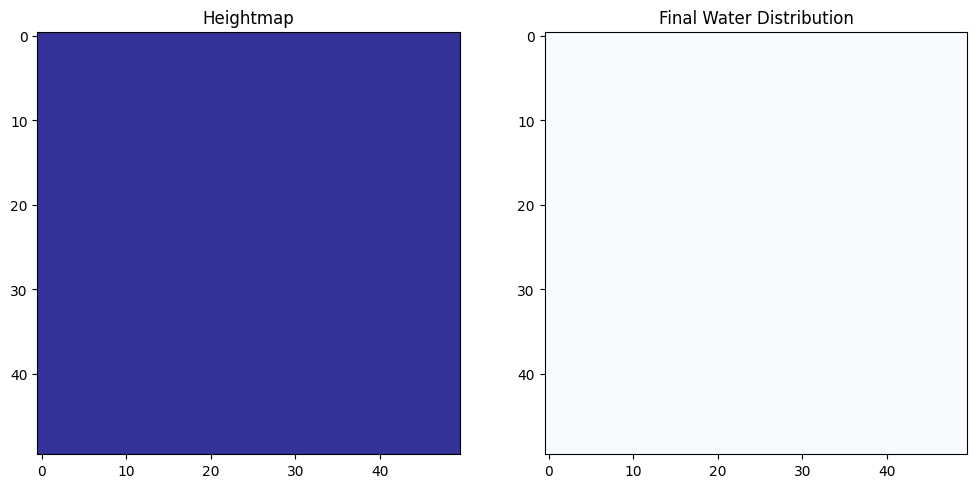

<Figure size 640x480 with 0 Axes>

In [13]:
# Plot the final water distribution and heightmap
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].imshow(heightmap, cmap='terrain')
ax[0].set_title('Heightmap')
#ax[0].colorbar(label='Height')

ax[1].imshow(water, cmap='Blues')
ax[1].set_title('Final Water Distribution')
#ax[1].colorbar(label='Water Level')

plt.show()


fig = plt.figure()
#ani = animation.FuncAnimation(fig, update_plot, frames=time_steps, repeat=False)
plt.show()